In [1]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("data.csv")
print(df.head())



   Company                   job     degree  salary_more_than_100k
0  google        Sales executive  bachelors                      0
1  google        Sales executive     master                      0
2  google       business manager  bachelors                      1
3  google       business manager     master                      1
4  google   computer programming  bachelors                      0


In [2]:
inputs = df.drop('salary_more_than_100k', axis='columns')
print(inputs)



       Company                   job     degree
0      google        Sales executive  bachelors
1      google        Sales executive     master
2      google       business manager  bachelors
3      google       business manager     master
4      google   computer programming  bachelors
5      google   computer programming     master
6   abc pharma       Sales executive  bachelors
7   abc pharma  computer programming     master
8   abc pharma      business manager  bachelors
9   abc pharma      business manager     master
10    facebook       Sales executive  bachelors
11    facebook       Sales executive     master
12    facebook      business manager  bachelors
13    facebook      business manager     master
14    facebook  computer programming  bachelors
15    facebook  computer programming     master


In [3]:
target = df['salary_more_than_100k']
print(target)


0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_than_100k, dtype: int64


In [4]:

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['Company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

print(inputs)



       Company                   job     degree  company_n  job_n  degree_n
0      google        Sales executive  bachelors          2      0         0
1      google        Sales executive     master          2      0         1
2      google       business manager  bachelors          2      1         0
3      google       business manager     master          2      1         1
4      google   computer programming  bachelors          2      2         0
5      google   computer programming     master          2      2         1
6   abc pharma       Sales executive  bachelors          0      0         0
7   abc pharma  computer programming     master          0      2         1
8   abc pharma      business manager  bachelors          0      1         0
9   abc pharma      business manager     master          0      1         1
10    facebook       Sales executive  bachelors          1      0         0
11    facebook       Sales executive     master          1      0         1
12    facebo

In [5]:
inputs_n = inputs.drop(['Company', 'job', 'degree'], axis='columns')
print(inputs_n)



    company_n  job_n  degree_n
0           2      0         0
1           2      0         1
2           2      1         0
3           2      1         1
4           2      2         0
5           2      2         1
6           0      0         0
7           0      2         1
8           0      1         0
9           0      1         1
10          1      0         0
11          1      0         1
12          1      1         0
13          1      1         1
14          1      2         0
15          1      2         1


In [6]:
model = tree.DecisionTreeClassifier()

print(model.fit(inputs_n, target))

print(model.score(inputs_n, target))

print(model.predict([[2, 1, 0]]))

print(model.predict([[2, 1, 1]]))



DecisionTreeClassifier()
1.0
[1]
[1]


In [7]:
digits = load_digits()

dir(digits)

dir(digits.target[:4])

df = pd.DataFrame(digits.data)
print(df.head())



    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [8]:
df['target'] = digits.target

print(df.head())



     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


In [9]:
x = df.drop('target', axis='columns')
print(x)



       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

In [10]:
y = df.target
print(y)



0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(len(x_test))
print(len(y_test))
print(len(x_train))
print(len(y_train))



360
360
1437
1437


In [12]:
model = RandomForestClassifier()
print(model.fit(x_train, y_train))

print(model.score(x_test, y_test))



RandomForestClassifier()
0.9722222222222222


In [13]:
model = RandomForestClassifier(n_estimators=100)
print(model.fit(x_train, y_train))

print(model.score(x_test, y_test))



RandomForestClassifier()
0.975


In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("salary.csv")
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


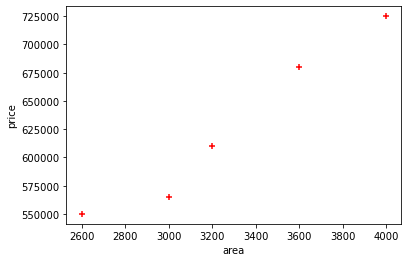

In [15]:
plt.xlabel('area')
plt.ylabel('price')
print(plt.scatter(df.area, df.price, color='red', marker='+'))

In [16]:
new_df = df.drop('price', axis='columns')
print(new_df)

   area
0  2600
1  3000
2  3200
3  3600
4  4000


In [17]:
model = linear_model.LinearRegression()

model.fit(new_df, df.price)

model.predict([[33000]])

print(model.coef_)

print(model.intercept_)

[135.78767123]
180616.43835616432


In [18]:
area_df = pd.read_csv("area.csv")

print(area_df)

    area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000


In [19]:
p = model.predict(area_df)

area_df['price'] = p

print(area_df)

area_df.to_csv("predictions.csv")

    area         price
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06


In [20]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math

df = pd.read_csv("prices.csv")
print(df)
print(df.bedrooms.median())

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
3.5


In [21]:
df.bedrooms.fillna(df.bedrooms.median())

print(df)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


In [22]:
model = linear_model.LinearRegression()
# print(df['price'])
print(model.fit(df.drop('price', axis=1), df.price))

print(model.predict([[3000, 3, 40]]))

print(model.predict([[3000, 3, 10]]))

print(model.coef_)

print(model.intercept_)

print(model.predict([[2500, 4, 5]]))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n
import math

data = pd.read_csv("hiring.csv")
print(data)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000


In [24]:
data.experience = data.experience.fillna("zero")
print(data)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000


In [25]:
data.experience = data.experience.apply(w2n.word_to_num)
print(data)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    NaN                           7      72000
7          11                    7.0                           8      80000


In [26]:
median_test_score = math.floor(data['test_score(out of 10)'].mean())
print(median_test_score)

7


In [27]:
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(median_test_score)
print(data)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    7.0                           7      72000
7          11                    7.0                           8      80000


In [28]:
reg = linear_model.LinearRegression()
print(reg.fit(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)']))

print(reg.predict([[2,9,6]]))

print(reg.predict([[12,10,10]]))

LinearRegression()
[53713.86677124]
[93747.79628651]


   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


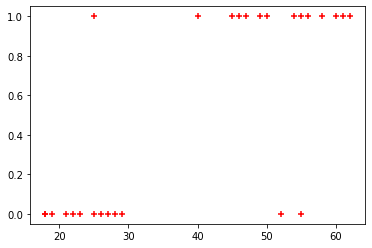

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y


df = pd.read_csv("insurance_data.csv")
print(df.head())

print(plt.scatter(df.age,df.bought_insurance,marker='+',color='red'))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

print(X_test)

    age
13   29
19   18
26   23


In [31]:
model = LogisticRegression()

print(model.fit(X_train, y_train))

print(X_test)

LogisticRegression()
    age
13   29
19   18
26   23


In [32]:
y_predicted = model.predict(X_test)

print(model.predict_proba(X_test))

print(model.score(X_test,y_test))

[[0.74586504 0.25413496]
 [0.92010127 0.07989873]
 [0.86084666 0.13915334]]
1.0


AxesImage(43.2,25.92;223.2x223.2)


<Figure size 432x288 with 0 Axes>

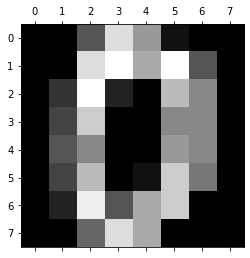

In [33]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn


digits = load_digits()

plt.gray()
print(plt.matshow(digits.images[0]))

In [34]:
dir(digits)

print(digits.target[:5])

[0 1 2 3 4]


In [35]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

len(X_test)

len(digits.data)

print(model.fit(X_train, y_train))

print(model.predict(X_test))

print(y_test)

print(model.score(X_test, y_test))

LogisticRegression()
[5 2 9 7 2 1 1 3 7 8 6 8 0 6 6 4 6 8 4 1 9 4 4 4 0 3 8 8 8 0 2 2 0 8 2 5 0
 0 2 8 4 6 0 2 8 5 7 1 5 2 9 2 3 7 9 7 6 3 4 7 1 6 8 2 1 8 4 1 5 1 4 3 3 4
 2 4 5 2 4 0 8 8 8 9 9 8 9 8 5 2 4 3 6 0 8 4 9 1 0 3 8 1 0 7 8 5 2 1 4 9 4
 2 5 8 5 7 0 3 0 2 6 3 0 4 6 7 9 9 1 5 7 5 5 4 3 4 7 8 6 9 5 5 7 5 1 8 9 9
 9 9 0 6 1 1 7 9 1 4 2 9 5 7 7 4 7 7 1 3 6 5 5 0 5 7 3 2 9 4 9 3 0 8 8 9 1
 7 0 3 0 2 5 7 6 7 0 0 4 5 6 5 8 0 5 0 8 4 6 4 0 6 1 5 1 1 4 0 9 3 1 0 5 8
 1 1 7 1 8 2 1 4 7 0 5 9 4 7 4 0 9 6 1 9 3 3 0 1 8 2 8 4 9 5 6 8 5 0 7 1 8
 1 1 0 5 1 7 1 2 3 8 2 0 2 9 2 2 7 4 1 6 5 2 0 8 6 1 4 3 5 1 7 8 1 8 5 2 1
 3 6 9 7 8 9 6 3 5 9 5 2 6 2 5 5 3 3 4 5 8 5 8 1 4 7 7 5 6 7 6 1 7 0 9 7 0
 0 8 7 8 0 7 8 7 6 6 1 8 8 6 4 5 5 9 2 3 5 4 7 5 0 3 2]
[5 2 5 7 2 1 1 3 7 8 6 8 0 6 6 4 6 8 4 1 9 4 4 4 0 3 8 8 8 0 2 2 0 8 2 5 0
 0 2 8 4 6 0 2 8 5 7 1 5 2 9 2 3 7 9 7 6 9 4 7 1 6 8 2 1 8 4 1 5 1 4 3 3 4
 2 4 5 2 4 0 1 8 8 9 9 8 9 8 5 2 4 3 6 0 8 4 9 1 0 3 8 1 0 7 8 5 2 1 4 9 4
 2 5 8 5 7 0 3 0 2 6 3 

C:\Users\Yasir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  1  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  1  0  0 36  0  0  0  0  1]
 [ 0  0  0  0  0 43  0  0  0  2]
 [ 0  0  0  0  0  1 29  0  0  0]
 [ 0  0  0  1  0  0  0 38  0  0]
 [ 1  1  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  0  0  0  2 29]]
Figure(720x504)
AxesSubplot(0.125,0.125;0.62x0.755)
Text(0.5, 42.0, 'Predicted')
Text(69.0, 0.5, 'Truth')


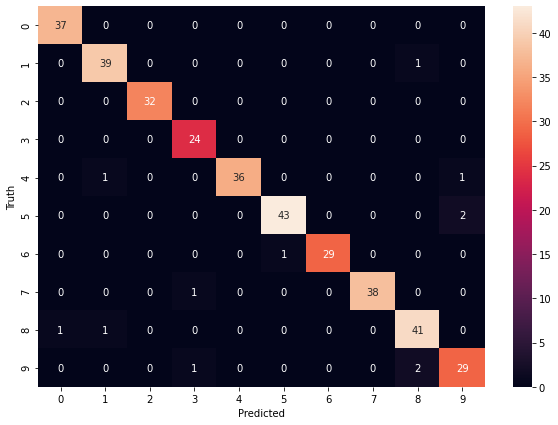

In [36]:
# Confusion Matrix

y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)

print(cm)

print(plt.figure(figsize = (10,7)))

print(sn.heatmap(cm, annot=True))

print(plt.xlabel('Predicted'))

print(plt.ylabel('Truth'))

In [37]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris=load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
iris.target_names


df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
df[df.target==1].head()

df[df.target==2].head()

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


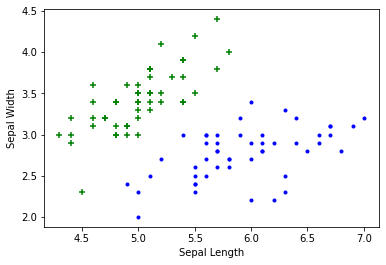

In [41]:
df[45:55]

df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

# Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

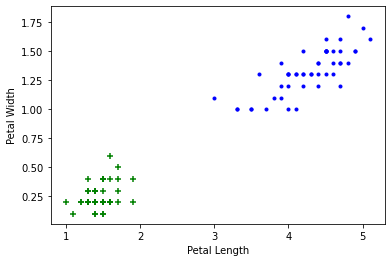

In [42]:
# Petal length vs Pepal Width (Setosa vs Versicolor)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [43]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(len(X_train))
print(len(X_test))

120
30


In [44]:
model = SVC()

print(model.fit(X_train, y_train))

print(model.score(X_test, y_test))

print(model.predict([[4.8,3.0,1.5,0.3]]))

SVC()
1.0
[0]
